<a href="https://colab.research.google.com/github/ItShivani/Convolutional-Neural-Networks/blob/master/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import argparse
import imutils
from collections import deque
import sys
from google.colab.patches import cv2_imshow
import cv2

In [0]:
CLASSES = open("/content/drive/My Drive/human-activity-recognition/action_recognition_kinetics.txt").readlines()
SAMPLE_DURATION = 16
SAMPLE_SIZE = 112

In [25]:
frames = deque(maxlen=SAMPLE_DURATION)
# load the human activity recognition model
print("[INFO] loading human activity recognition model...")
net = cv2.dnn.readNet("/content/drive/My Drive/human-activity-recognition/resnet-34_kinetics.onnx")

[INFO] loading human activity recognition model...


In [26]:
print("[INFO] accessing video stream...")
vs = cv2.VideoCapture("/content/drive/My Drive/human-activity-recognition/example_activities.mp4")

[INFO] accessing video stream...


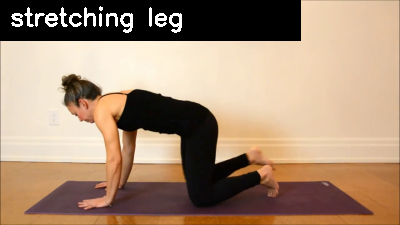

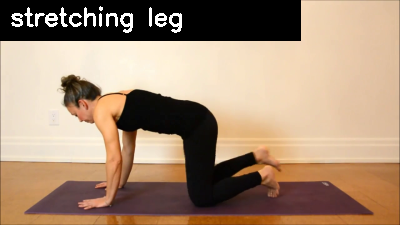

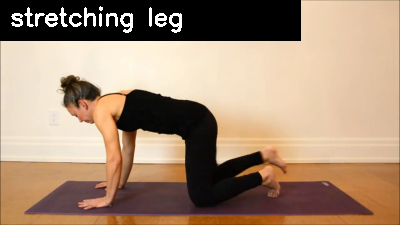

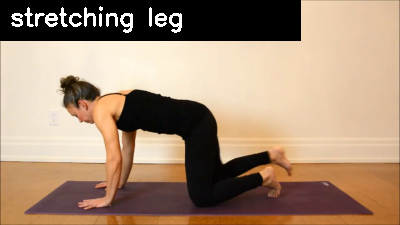

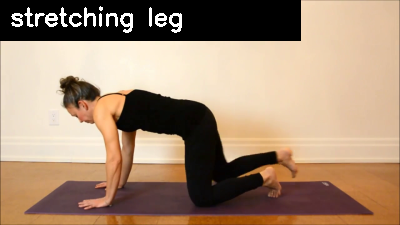

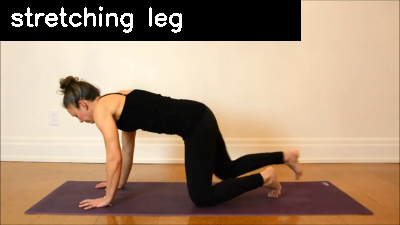

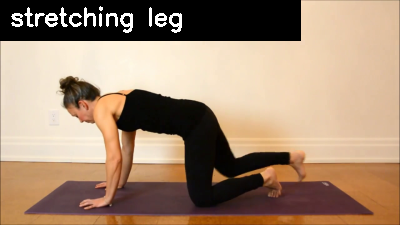

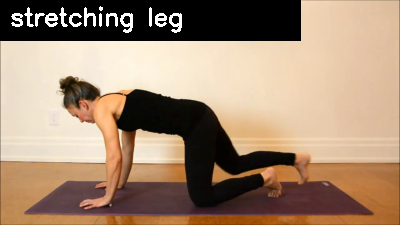

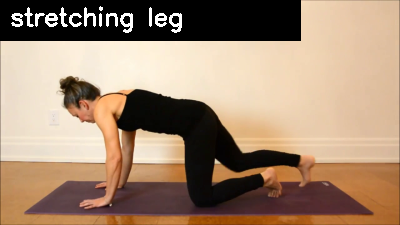

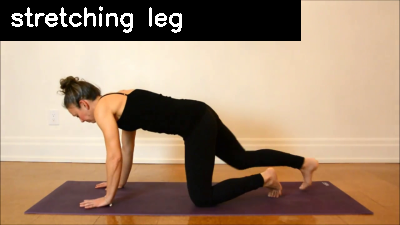

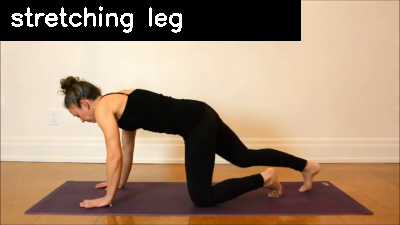

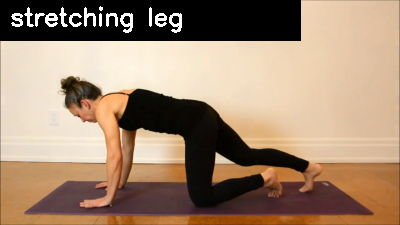

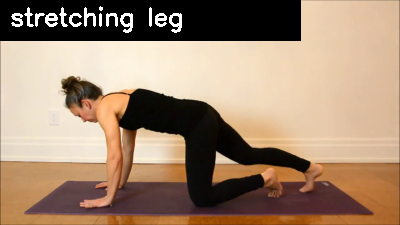

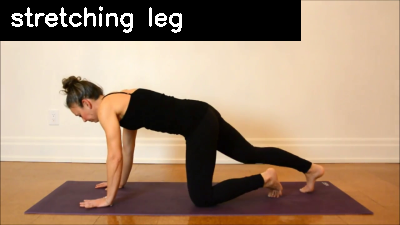

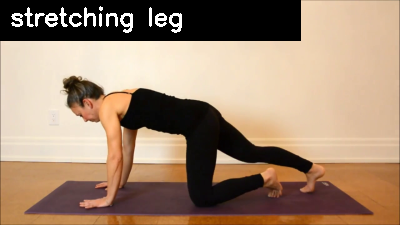

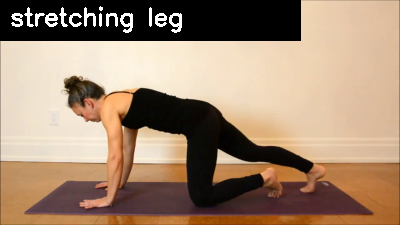

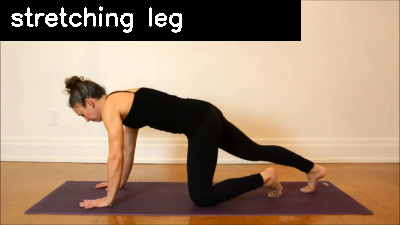

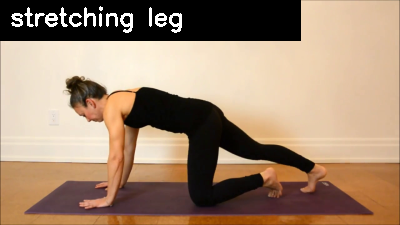

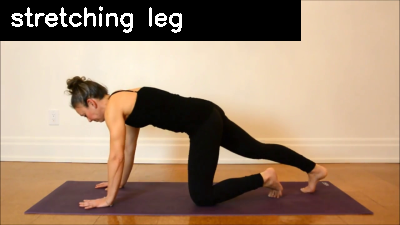

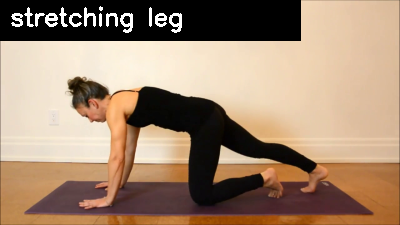

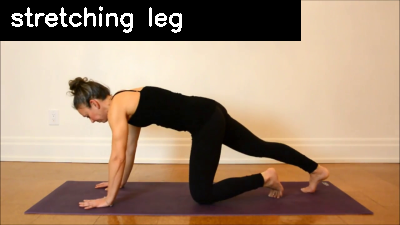

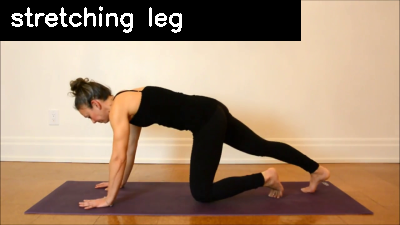

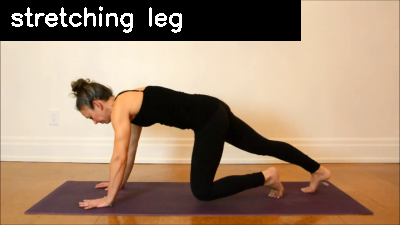

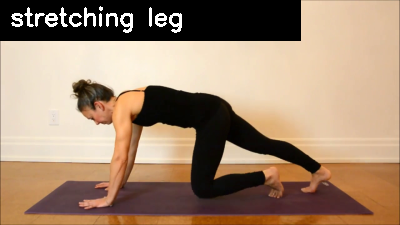

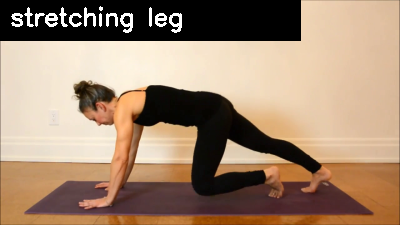

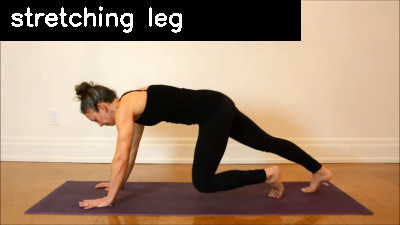

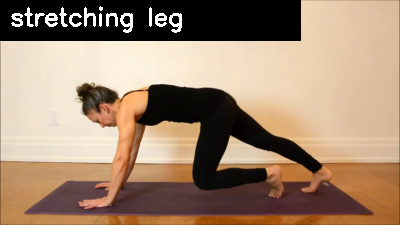

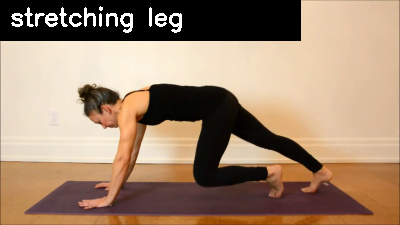

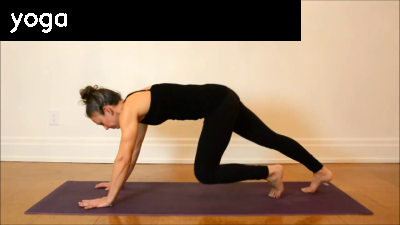

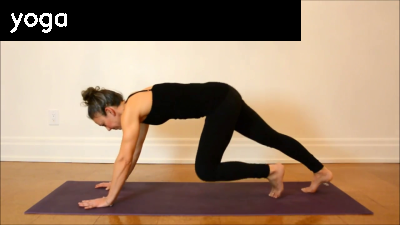

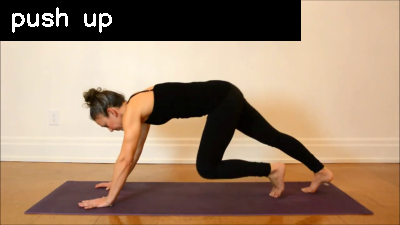

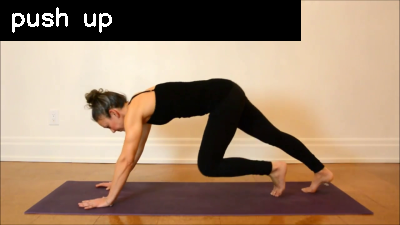

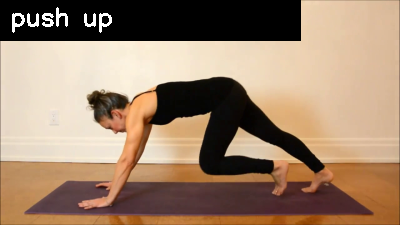

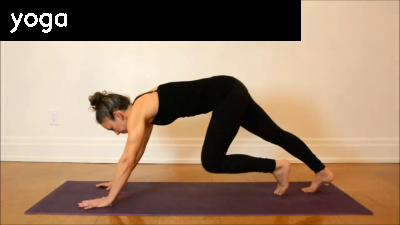

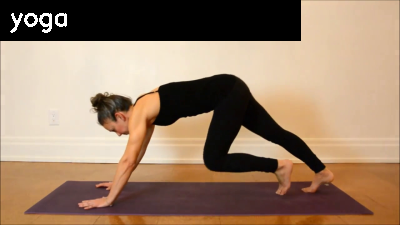

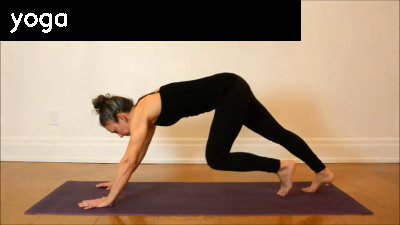

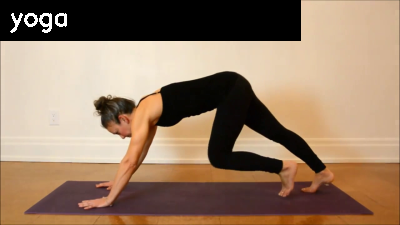

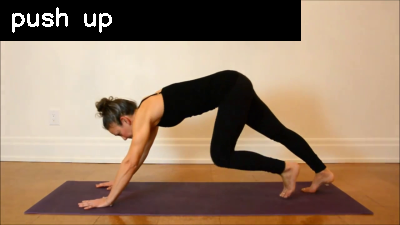

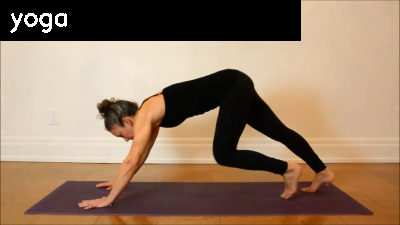

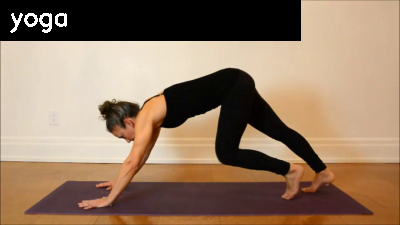

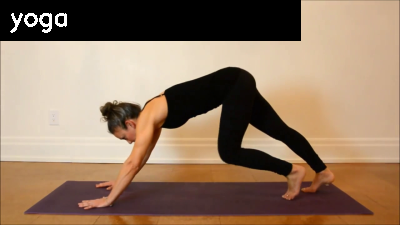

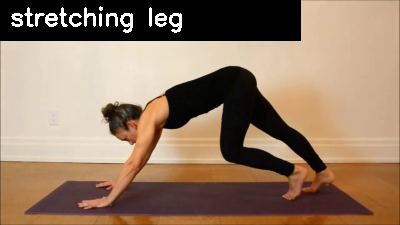

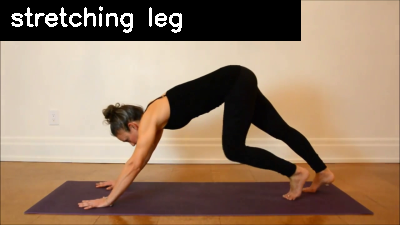

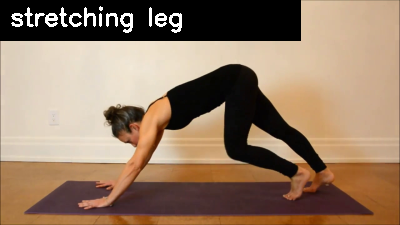

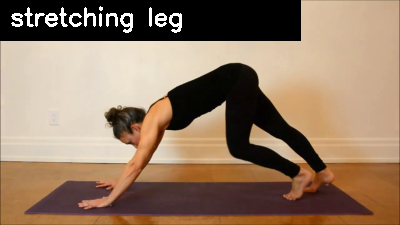

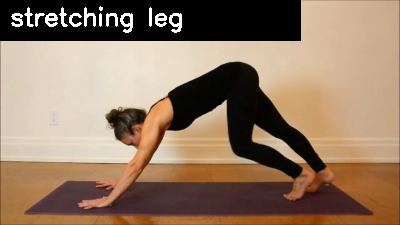

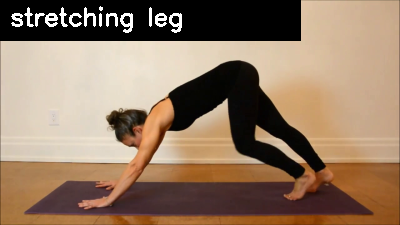

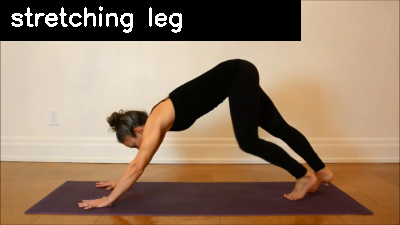

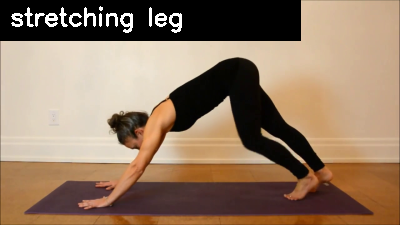

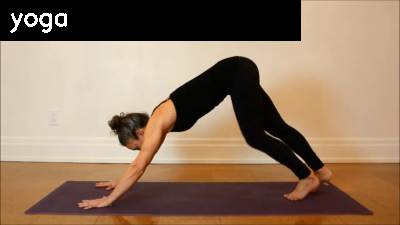

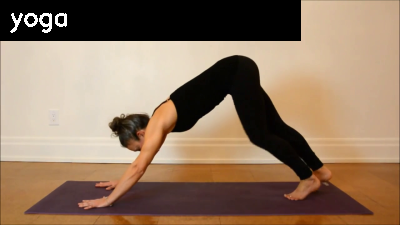

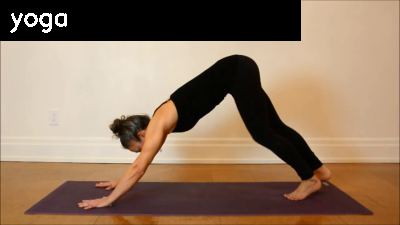

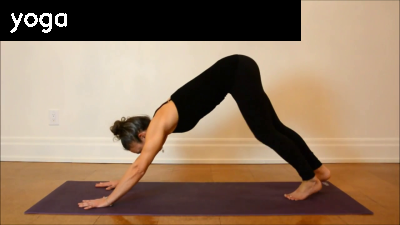

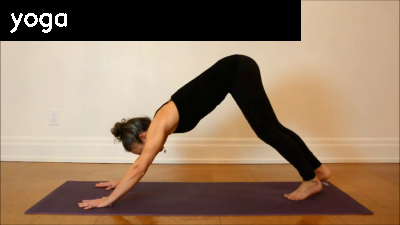

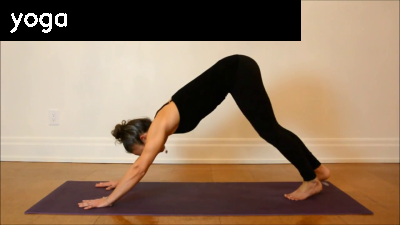

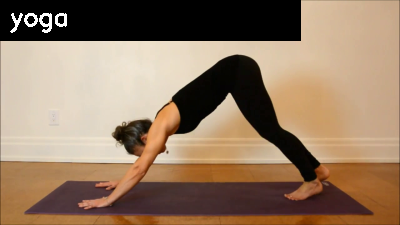

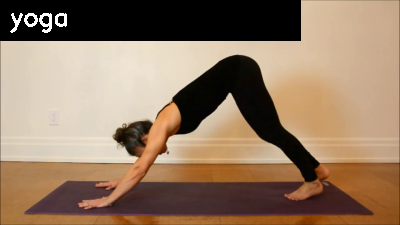

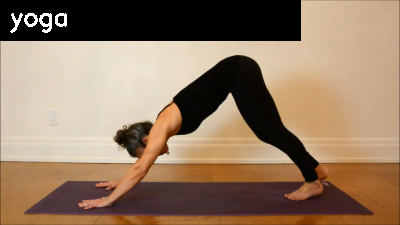

In [0]:
# loop over frames from the video stream
while True:
	# read a frame from the video stream
  (grabbed, frame) = vs.read()

  # if the frame was not grabbed then we've reached the end of
  # the video stream so break from the loop
  if not grabbed:
    print("[INFO] no frame read from stream - exiting")
    break

  # resize the frame (to ensure faster processing) and add the
  # frame to our queue
  frame = imutils.resize(frame, width=400)
  frames.append(frame)

  # if our queue is not filled to the sample size, continue back to
  # the top of the loop and continue polling/processing frames
  if len(frames) < SAMPLE_DURATION:
    continue

	# now that our frames array is filled we can construct our blob
  blob = cv2.dnn.blobFromImages(frames, 1.0,(SAMPLE_SIZE, SAMPLE_SIZE), (114.7748, 107.7354, 99.4750),swapRB=True, crop=True)
  blob = np.transpose(blob, (1, 0, 2, 3))
  blob = np.expand_dims(blob, axis=0)

  # pass the blob through the network to obtain our human activity
  # recognition predictions
  net.setInput(blob)
  outputs = net.forward()
  label = CLASSES[np.argmax(outputs)]
  label = label[:-1]

  # draw the predicted activity on the frame
  cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
  cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

	# display the frame to our screen
  cv2_imshow(frame)
  
  key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
  if key == ord("q"):
    break